In [24]:
#import numpy to use seed 
import numpy as np
import pandas as pd
from numpy.random import seed
np.random.seed(1)

In [25]:
#import other dependencies

import os
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

Read CSV create, and clean dataframe

In [26]:
#Read in CSV and create dataframe
mlb_teams= pd.read_csv("Teams.csv")

mlb_teams

,yearID,lgID,G,G.1,W,L,WSWin,R,AB,H,...,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,name
0,1969,NL,162,81,93,69,N,691,5460,1411,...,22,141,485,665,59,3.53,38,7,42,Atlanta Braves
1,1969,AL,162,81,109,53,N,779,5518,1465,...,29,175,634,806,82,2.83,50,20,36,Baltimore Orioles
2,1969,AL,162,81,87,75,N,743,5494,1381,...,37,197,658,923,41,3.92,30,7,41,Boston Red Sox
3,1969,AL,163,81,71,91,N,528,5316,1221,...,29,88,516,929,54,3.54,25,9,39,California Angels
4,1969,AL,162,81,68,94,N,625,5450,1346,...,27,112,552,844,54,4.21,29,10,25,Chicago White Sox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2019,NL,162,81,91,71,N,764,5449,1336,...,24,210,561,1420,116,3.80,1,14,52,St. Louis Cardinals
1404,2019,AL,162,81,96,66,N,769,5628,1427,...,29,217,542,1493,94,3.65,0,12,46,Tampa Bay Rays
1405,2019,AL,162,81,78,84,N,810,5540,1374,...,24,223,534,1578,131,5.06,4,9,33,Texas Rangers
1406,2019,AL,162,81,67,95,N,726,5493,1299,...,21,247,509,1514,51,4.79,1,7,33,Toronto Blue Jays


In [27]:
#Get list of dataframe columns

mlb_teams.columns

Index(['yearID', 'lgID', 'G', 'G.1', 'W', 'L', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO', 'SV', 'name'],
      dtype='object')

In [28]:
#Select columns for dataframe

mlb_df = mlb_teams[['yearID', 'lgID', 'G', 'G.1', 'W', 'L', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO', 'SV']]
mlb_df.tail(37)

,yearID,lgID,G,G.1,W,L,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV
1371,2018,AL,162,81,89,73,N,677,5513,1402,256,32,176,430,1221,79,4.13,3,12,60
1372,2018,NL,162,81,73,89,N,603,5541,1324,255,30,133,448,1467,77,3.95,1,15,36
1373,2018,NL,162,81,88,74,N,759,5498,1369,248,9,205,525,1380,63,3.85,1,8,43
1374,2018,AL,162,81,90,72,N,716,5475,1415,274,43,150,540,1388,128,3.74,0,14,52
1375,2018,AL,162,81,67,95,N,737,5453,1308,266,24,194,555,1484,74,4.92,1,5,42
1376,2018,AL,162,81,73,89,N,709,5477,1336,320,16,217,499,1387,47,4.85,0,3,39
1377,2018,NL,162,81,82,80,N,771,5517,1402,284,25,191,631,1289,119,4.04,2,7,40
1378,2019,NL,162,81,85,77,N,813,5633,1419,288,40,220,540,1360,88,4.25,0,11,45
1379,2019,NL,162,81,97,65,N,855,5560,1432,277,29,249,619,1467,89,4.19,1,8,44
1380,2019,AL,162,81,54,108,N,729,5596,1379,252,25,213,462,1435,84,5.59,0,5,27


In [29]:
#Set X(data) and y(team)variables

data = mlb_df.drop("lgID", axis = 1)
outcome = mlb_df["lgID"]
print(data.shape, outcome.shape)

(1408, 19) (1408,)


In [30]:
#Use getdummies to convert strings

data_LG = data.copy()
data_bin = pd.get_dummies(data_LG, columns=["WSWin"])
data_bin = data_bin.drop(columns=['WSWin_N'])

data_bin.head()

,yearID,G,G.1,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,WSWin_Y
0,1969,162,81,93,69,691,5460,1411,195,22,141,485,665,59,3.53,38,7,42,0
1,1969,162,81,109,53,779,5518,1465,234,29,175,634,806,82,2.83,50,20,36,0
2,1969,162,81,87,75,743,5494,1381,234,37,197,658,923,41,3.92,30,7,41,0
3,1969,163,81,71,91,528,5316,1221,151,29,88,516,929,54,3.54,25,9,39,0
4,1969,162,81,68,94,625,5450,1346,210,27,112,552,844,54,4.21,29,10,25,0


Preprocess data

In [31]:
#Import SciKit libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [32]:
#Split data and teams into training and test data

X_train, X_test, y_train, y_test = train_test_split(data_bin, outcome, random_state=60)
y_train

901     AL
710     NL
1017    NL
250     NL
1298    AL
        ..
72      NL
99      AL
399     AL
1089    NL
205     AL
Name: lgID, Length: 1056, dtype: object

In [33]:
#Scale data using MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[0.68      , 0.98360656, 0.925     , ..., 0.125     , 0.52631579,
        0.        ],
       [0.54      , 0.96721311, 0.925     , ..., 0.41666667, 0.52631579,
        0.        ],
       [0.74      , 0.96721311, 0.925     , ..., 0.125     , 0.36842105,
        0.        ],
       ...,
       [0.3       , 0.98360656, 0.925     , ..., 0.41666667, 0.38596491,
        0.        ],
       [0.8       , 0.96721311, 0.925     , ..., 0.41666667, 0.49122807,
        0.        ],
       [0.16      , 0.96721311, 0.925     , ..., 0.25      , 0.24561404,
        0.        ]])

In [34]:
#Label-encode team

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_test

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [35]:
##Import KNeighborsClassifier and train

from sklearn.neighbors import KNeighborsClassifier


In [36]:
# Loop through different k values to see which has the highest accuracy

train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.642
k: 3, Train/Test Score: 0.838/0.696
k: 5, Train/Test Score: 0.794/0.682
k: 7, Train/Test Score: 0.780/0.690
k: 9, Train/Test Score: 0.775/0.705
k: 11, Train/Test Score: 0.777/0.679
k: 13, Train/Test Score: 0.766/0.642
k: 15, Train/Test Score: 0.765/0.645
k: 17, Train/Test Score: 0.761/0.639
k: 19, Train/Test Score: 0.751/0.642
k: 21, Train/Test Score: 0.752/0.645
k: 23, Train/Test Score: 0.750/0.670
k: 25, Train/Test Score: 0.739/0.682
k: 27, Train/Test Score: 0.743/0.690
k: 29, Train/Test Score: 0.740/0.679
k: 31, Train/Test Score: 0.723/0.673
k: 33, Train/Test Score: 0.723/0.645
k: 35, Train/Test Score: 0.723/0.659
k: 37, Train/Test Score: 0.712/0.662
k: 39, Train/Test Score: 0.714/0.653
k: 41, Train/Test Score: 0.714/0.668
k: 43, Train/Test Score: 0.716/0.662
k: 45, Train/Test Score: 0.716/0.662
k: 47, Train/Test Score: 0.707/0.665
k: 49, Train/Test Score: 0.705/0.651
k: 51, Train/Test Score: 0.706/0.659
k: 53, Train/Test Score: 0.698/0.659
k: 55,

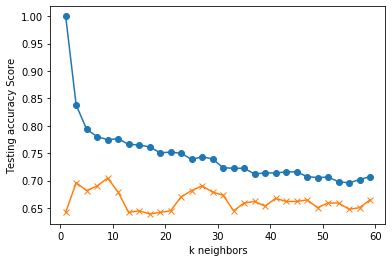

In [37]:
#Plot accuracy values

import matplotlib.pyplot as plt
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train_scaled, y_train)
print('k=42 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=42 Test Acc: 0.682


Evaluate Model

In [41]:
import joblib
filename = 'SWilliams_KNN.sav'
joblib.dump(knn, filename)



['SWilliams_KNN.sav']

Predict World Series Champs

In [43]:
##Print accuracy score for test data

